# Assignment 3 (OPTION A): Machine Learning

<b>Group members:</b> <br><br>
Ung Xuan Dat (s3932156)

Pham Quang Huy (s3970891)

Le Phuong Ngan (s3978567)

Hong Thieu Kiet (s3993986)
___

# Table of Contents:

## I. LOOK AT THE BIG PICTURE AND DATA EXPLORATION

### A. Data input and visualization

#### 1.1 Look at the big picture
#### 1.2 Data Exploration: Get the data
#### 1.3 Scatter plot between 2 features

### B. Data input and visualization

## II. Data Processing

#### 1. Handling missing values
#### 2. Identify and handle outliers
#### 3. Encode categorical features
#### 4. Split dataset into training and testing data

## III. Model Training and Evaluation

### A. Model Training

#### 1. Linear Regression model
#### 2. Decision Tree Regressor model
#### 3. Random Forest Regressor model
#### 4. Polinomial Regression model
#### 5. Support Vector Regression 
#### 6. Gradient Boosting Regressor
#### 7. XGBoost Regressor

### B. Evaluation

### C. Comparision of Different Models

## IV. Hyperparameter Fine-tuning

### A. Evaluation

### B. Justification for Value ranges

## V. Model Testing and Analysis

### A. Feature importance

### B. Model performance

### C. Potential limitations and possible low performance causes

### D. Suggestions for Improvements

### E. Conclusion
***

# I. LOOK AT THE BIG PICTURE AND DATA EXPLORATION:

## A. Data input and visualization



### 1.1 Look at the big picture

1. End goal of the project: The purpose of this Machine Learning (ML) application project is to train AI models, allowing predictions of each car's the selling price depending on their stated characteristics and conditions. The end goal is to help businesses understand the market trend and produce new profitable products in the future. The dataset can be analyzed and evaluated to gain better insights on the second-hand cars, with a few potential uses, including:
    - Predict and anticipate a trend in consumer behaviors, realize the factors that might cause these behaviors and what aspects make certain car models more appealing compared to others.
    - The dataset may be used to evaluate fuel efficiency of different models as there are a variety of characteristics, including manufactured year and mileage, that can potentially affect it.
    - Lastly, the dataset can potentially be used to analyze and observe how the number of owners can affect the overall performance of the asset on the second-hand market.

2. Algorithm:
The algorithm to use is supervised regression.

3. Performance Measure:
* Root Mean Squared Error (RMSE) - Square root of the average squared difference between speculated values of the dataset and actual values from the data.
* R^2 Score (Coefficient of Determination) (Later referred to as <u>R2 Score</u>) - The coefficient measures the proportion of variance in the dependent variable predicted from the independent variables.

4. Collected Data:
The data is already collected from the lecturer.
The dataset is about car retails.

### 1.2 Data Exploration: Get the data

In [18]:
# Python version: 3.12.5

# Packages required to be installed when running thre Jupyter notebook file 

# NOTE: Please remove the commment hashtag and the white space ("# ") of the lines below to 
#       install all the necessary python packages the first time to run this Jupyter notebook smoothly. 
#       Thank you!

# %pip install scikit-learn
# %pip install xgboost
# %pip install pandas
# %pip install matplotlib

In [19]:
# In[0]: IMPORT AND FUNCTIONS
#region 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold   
from statistics import mean
import joblib 
import os
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [20]:

# In[2]: STEP 2. GET THE DATA (DONE). LOAD DATA
datasets_folder = 'datasets'
file_name = 'CarDetailsV3.csv'

file_path = os.path.join(datasets_folder, file_name)

raw_data = pd.read_csv(file_path)

### Our label data is selling_price with the datatype int64. 

### Overview of the dataset:

The car dataset provides details on second-hand cars, including specific information on each car, such as, the selling price, manufacturing and performance specifications as well as a few indicators of condition of the asset.

The table above shows that there are 8128 rows, structured and organized in 13 columns, which each of them providing distinct characteristics of the tradeable asset. However, there are some missing values in engine, max_power, torque, seats that are needed to be dealt with to ensure the stability, consistency and reliability when the data is being processed later on.

### 1.3 Scatter plot between 2 features

<b>Feature selections</b>
- To approach this regression problem and focus on predicting the price, features that are suspected to have an impactful correlation raking from high to low:
    1. Kilometers Driven (km_driven)
    2. The year the car was produced (year)
    3. Fuel consumption (fuel)


In [21]:
# In[3]: STEP 3. DISCOVER THE DATA TO GAIN INSIGHTS
#region
# 3.1 Quick view of the data
print('\n____________ Dataset info ____________')
print(raw_data.info())      
print('\n____________ Some first data examples ____________')
print(raw_data.head(3)) 
print('\n____________ Counts on a feature of fuel ____________')
print(raw_data['fuel'].value_counts()) 
print('\n____________ Counts on a feature of seller_type ____________')
print(raw_data['seller_type'].value_counts()) 
print('\n____________ Counts on a feature of owner ____________')
print(raw_data['owner'].value_counts()) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())   
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,5,48], [2, 5]] ) # Refer using column ID 


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None

____________ Some first data examples ____________
                           name  year  selling_price  km_driven    fuel 

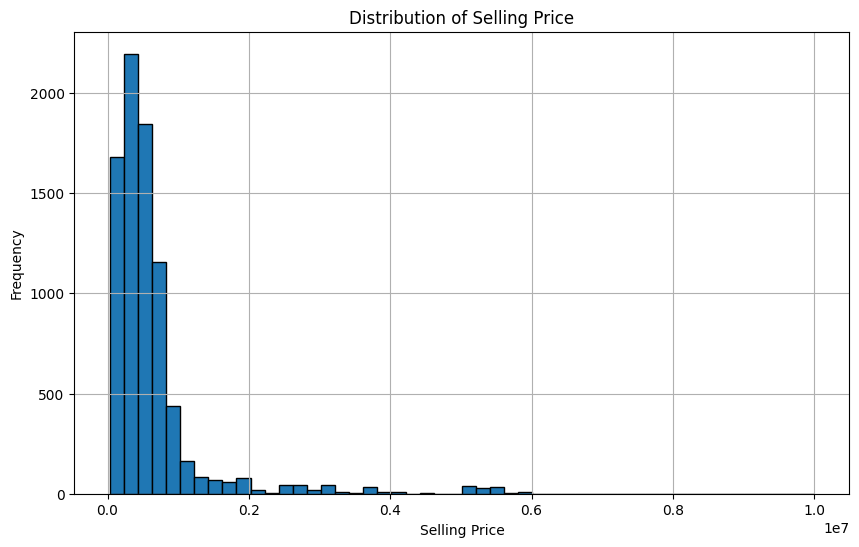

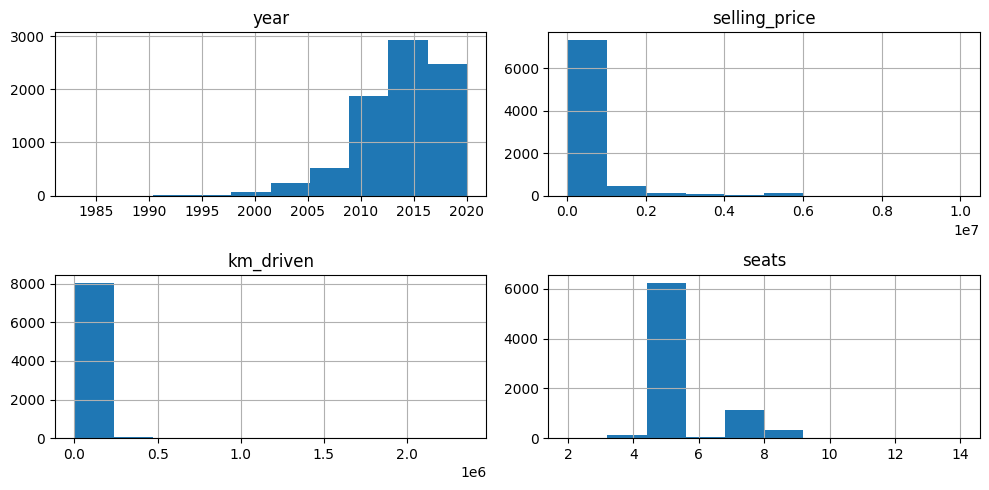


 selling_price    1.000000
year             0.414092
seats            0.041358
km_driven       -0.225534
Name: selling_price, dtype: float64


In [22]:
# Plotting the distribution of the 'selling_price' feature
plt.figure(figsize=(10, 6))
plt.hist(raw_data['selling_price'], bins=50, edgecolor='black')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3.5 Plotting histogram of numeric features

raw_data.hist(figsize=(10,5))
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.tight_layout()
plt.show()

# 3.6 Compute correlations b/w features
corr_matrix = raw_data.corr(numeric_only=True)
print('\n',corr_matrix["selling_price"].sort_values(ascending=False))

## B. Explanation and Analysis 

### <u>Relationship between selling_price and km_driven</u>

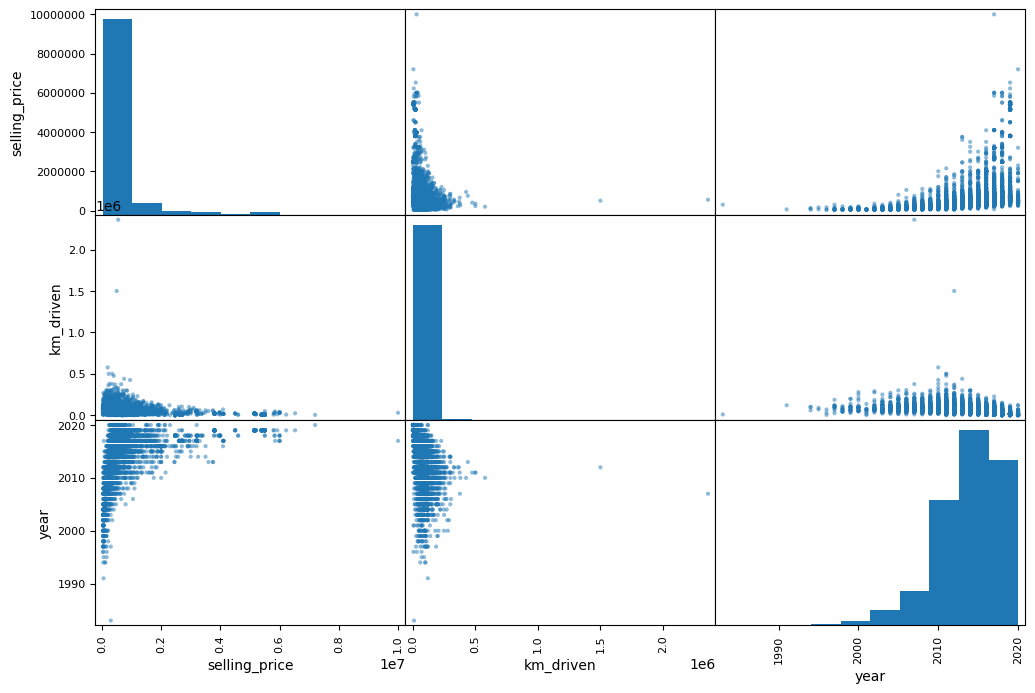

In [23]:
# 3.3 Scatter plot b/w every pair of features
from pandas.plotting import scatter_matrix   
features_to_plot = ["selling_price", "km_driven", "year", "fuel"]
scatter_matrix(raw_data[features_to_plot], figsize=(12, 8))
plt.show()

Most data lies in the bottom left corner. Most vehicles have been driven less than 50,000 units and the selling prices are between 0 to 600,000 units.
Outliers of extremely high km_driven and extremely high prices are available.

They have an negative linear correlation which indicates that as the amount of km_driven increases, the selling prices tend to decrease exponentially. This means that cars with high km_driven tend to be sold with a lower price.

### <u>Relationship between selling_price and year </u>

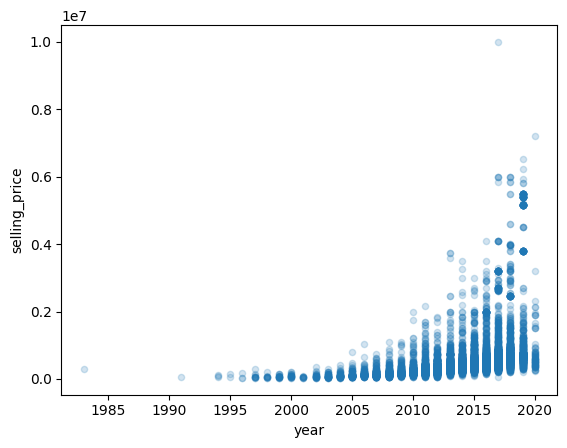

In [24]:
raw_data.plot(kind="scatter", y="selling_price", x="year", alpha=0.2)
plt.show()

Most data lies at the bottom right of the plot. Most vehicles were produced before year 1995.

They have a positive linear relationship which indicates as the production year increases, the price also increases. This means that newer cars are sold with higher prices.

### <u>Relationship between selling_price and fuel </u>

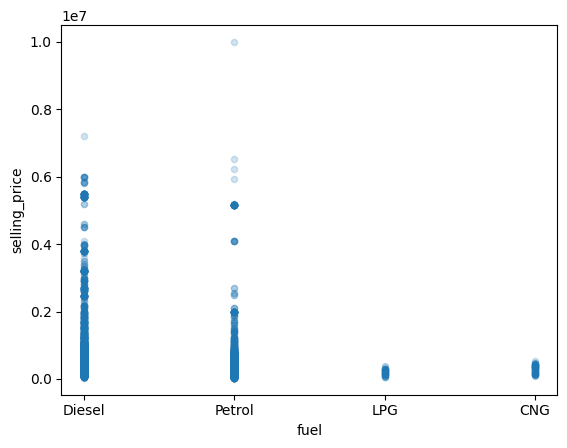

In [25]:
raw_data.plot(kind="scatter", y="selling_price", x="fuel", alpha=0.2)
plt.show()

Most vehicles use Diesel and Petrol as their fuel which a minority of them use LPG and CNG.

Diesel has the biggest spread with some cars reach the top selling prices. However, majority are still at the bottom with a low selling price.

Petrol has one outlier with the highest selling price but the spread was less and data mostly lie at the lower price.

LPG and CNG have no outliers and data lies in the lower range which is below 100,000 units.

Ranking from high to low selling price:
1. Diesel
2. Petrol
3. CNG
4. LPG

### <u>Scatter plot between selling_price and other features</u>
A few insights gain from this plot: <br>

<b>About km_driven</b>
* Very low km_driven vehicles (close to 0 km driven) seem to command a premium, with some of the highest prices in this category.
* There are some very old vehicles ( before year 2000) with extremely low km_driven, which could be classic or collector cars.
Conversely, there are some relatively new vehicles with unusually high km_driven, possibly indicating commercial use or long-distance drivers.

<b>About year</b>
* The highest frequency appears to be for the most recent years, from 2018 to 2020.
* Recent cars before 2015 show a tight cluster of low km_driven, while older cars have a much wider spread of km_driven.

<b>Distribution Histogram</b><br>
<br>
The highest frequency comes from vehicle with the selling price of 200,000 units and the lowest frequency is vehicle with the price of  500,000 units.
Most vehicles lie between 0 to 2,000,000 units of selling price. Above 2,000,000 units, there are only few outliers.
Tha majority of outliers are located in the approximate range of 300,000 units and 500,000 units.

<b>Correlation coefficients between selling_price and other variables </b>

1. selling_price to year (0.414092): <br>
Moderate positive correlation which means higher year has higher selling prices.
<br>
2. selling_price to seat (0.041358): <br>
Weak positive correlation which means number of seats has minimal relationship with selling price. However, more seats could slightly increase the price.
<br>

3. selling_price to km_driven (-0.22553): <br>
Weak negative correlation which means higher km_driven has lower selling price. However, the correlation is quite weak so this cannot be taken as a trend.
<br>



#### <b> Generally: </b>
year is the strongest predictor of selling price, while seats is the weakest factor.



# II. Data Processing:

### 1. Handling missing values

Our chosen dataset on cars is very complete with few missing values. In order to fill in the remaining missing numbers of the data, we will be using the imputation method.

- 'SimpleImputer' will handle the imputation process in the pipeline and fill in the missing values based on chosen parameters. The parameters are:
    + (missing_values = np.nan) -> Any not a Number (nan) will be considered as missing values.
    + (strategy = "constant") -> The missing values will be replaced with a constant value.
    + (fill_value = "NO INFO") -> If missing values are detected, they will be replaced with the string "NO INFO".
    + (copy = true) -> This will ensure only the copy of the data will be modified, preventing modification on original data.

- Benefits of imputation:
    + Ensures that the model will not crash due to missing values as they are replaced with either a default value or a placeholder.
    + Imputation also allows car records to be retained with missing values such as missing mileage, torque, engine, and ensuring that they will not be discarded due to missing data.

- Afterwards, all the filled in values along with the copied version of the original car data will be passed onto 'OneHotEncoder' for encoding.


### 2. Identify and handle outliers

Through visualizing our data, we noticed a few outliers, which their selling prices are almost doubled the ones that are just below them. As a result, after thorough research on the second hand car markets, we concluded that they are anomalies and implemented Interquartile Range (IQR) to eliminate them. 

- Firstly, we use 4th percentile (0.04) and 96th percentile (0.96) instead of the traditional 25th percentile (0.25) and 75th percentile (0.75). Hence, a broader middle range of car selling prices will be defined.

- Secondly, since there are few outliers, the percentiles we are using will eliminate all the lowest extreme values as well as the highest extreme values.

- Benefits of using Interquartile Range (IQR):
    + IQR helps detect outliers without being affected by them, unlike other measures such as mean or standard deviation.

    + The method also helps eliminate outliers that exceeded the reasonable range for both lower bounds and higher bounds of the selling price, where they are considered as unreasonably overpriced or underpriced.

    + Finally, the IQR method focuses on only the middle range of the car prices, providing and emphasizing a better representation of the overall selling prices of cars.

- After removing the outliers, our raw data will become filtered data and stored in the variable 'filtered_data'.

In [26]:
# In[4]: STEP 4. PREPARE THE DATA 
#region
# 4.1 Remove unused features
if "name" in raw_data.columns:
    raw_data.drop(columns=["name"], inplace=True)

raw_data.info()

# 4.1.1 Removing extreme outliers of lower and higher boundaries

Q1 = raw_data['selling_price'].quantile(0.04)
Q3 = raw_data['selling_price'].quantile(0.96)
IQR = Q3 - Q1

# Define a threshold for what counts as an outlier (usually 1.5 times the IQR)
threshold = 1.5

# Remove outliers
filtered_data = raw_data[(raw_data['selling_price'] >= Q1 - threshold * IQR) & 
                         (raw_data['selling_price'] <= Q3 + threshold * IQR)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


### 3. Encode categorical features

Our group has decided to choose 'fuel', 'seller_type' and 'owner' as our categorical features for encoding. 
- A list 'cat_feat_names' has been created to store these columns as specified feature type. The list will be utililzed along with 'OneHotEncoder' functions to process and analyze.

### 4. Split dataset into training and testing data

For our car dataset, we will be spliting the data into a training-test set (train_set), and testing set (test_set). The 'test_set' will be not utilized until testing phase, which will be after <b>Hyperparamter Fine-tuning</b> part of the program.

- Stratified sampling: This method will be used to ensure the proportions of the specific categories, in this case is our selling price, are maintained in both the training set and test set.

- Benefits of stratfied sampling: 
    + Proportional representation: If there is a significant amount of low selling price cars in the list, for example, between 200000 and 400000, then this ensures that the different selling price ranges are represented proportionally. Otherwise, imbalanced frequencies of car selling prices in the dataset can lead to biased results, either being over-represented or under-represented.
    
    + More reliable evaluation metrics: With stratified sampling, later on, when we are using our test data and the trained data to evaluate the model, the applied metrics are more reliable, preventing misleading performances due to imbalanced representation of each selling price categories.

- Five bins are formed when cutting the selling prices along with boundaries:
    + 0 to 200,000
    + 200,000 to 400,000
    + 400,000 to 600,000
    + 600,000 to 800,000
    + 800,000 to infinity (hence, np.inf)

- Labels (2, 4, 6, 8, 10) are assigned to each bins for easier and simpler plotting and classification later on.

- We will be creating single one train-test split, with the test size being 12.5% (approximately 1000 records), and 87.5% for the training data size.

- Lastly, 'iloc' method is used along with the 'filtered_data' to create the 'train_set' and 'test_set'.

C:\Users\herom\AppData\Local\Temp\ipykernel_29852\3741919711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, "SELLING PRICE RANGE"] = pd.cut(filtered_data["selling_price"],


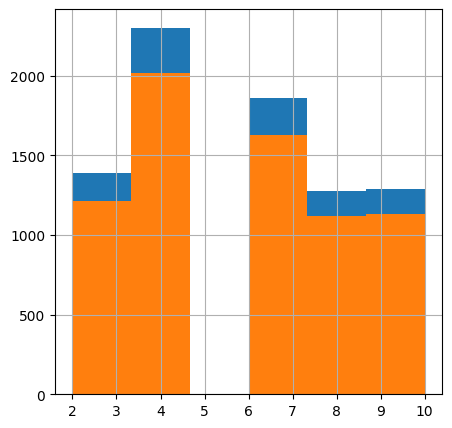


____________ Split training and test set ____________
7108 training + 1016 test examples
      year  selling_price  km_driven    fuel seller_type transmission  \
1538  2012         550000      83000  Petrol  Individual       Manual   
7275  2009         155000      63000  Petrol  Individual       Manual   
4418  2019        3800000      20000  Diesel  Individual    Automatic   
7105  2012         170000      90000  Petrol  Individual       Manual   

            owner     mileage   engine  max_power          torque  seats  \
1538  First Owner   16.8 kmpl  1497 CC  116.3 bhp  146Nm@ 4800rpm    5.0   
7275  Third Owner         NaN      NaN        NaN             NaN    NaN   
4418  First Owner   18.0 kmpl  1969 CC    190 bhp           400Nm    5.0   
7105  Third Owner  20.92 kmpl   998 CC   67.1 bhp   90Nm@ 3500rpm    5.0   

     SELLING PRICE RANGE  
1538                   6  
7275                   2  
4418                  10  
7105                   2  
[array(['CNG', 'Diesel', 'LP

['models/full_pipeline.pkl']

In [27]:
#%% 4.2 Split training-test set and NEVER touch test set until test phase
import pandas as pd

# Stratified sampling method

# Create new feature "PRICE RANGE": the distribution we want to remain
filtered_data.loc[:, "SELLING PRICE RANGE"] = pd.cut(filtered_data["selling_price"],
                                    bins=[0, 200000, 400000, 600000, 800000, np.inf],
                                    labels=[2,4,6,8,10]) 
    
# Create training set and test set
from sklearn.model_selection import StratifiedShuffleSplit  
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.125, random_state=42)
                                                                                  
for train_index, test_index in splitter.split(filtered_data, filtered_data["SELLING PRICE RANGE"]):
    train_set = filtered_data.iloc[train_index]
    test_set = filtered_data.iloc[test_index]              
    
# See if it worked as expected
if 1:
    filtered_data["SELLING PRICE RANGE"].hist(bins=6, figsize=(5,5))
    train_set["SELLING PRICE RANGE"].hist(bins=6, figsize=(5,5)); plt.show()

# Remove the new feature
for _set_ in (train_set, test_set):
    _set_ = _set_.drop(columns="SELLING PRICE RANGE")

print('\n____________ Split training and test set ____________')     
print(len(train_set), "training +", len(test_set), "test examples")
print(train_set.head(4))

#%% 4.3 Separate labels from data, since we do not process label values
train_set_labels = train_set["selling_price"].copy()
train_set = train_set.drop(columns = "selling_price") 
test_set_labels = test_set["selling_price"].copy()
test_set = test_set.drop(columns = "selling_price") 

#%% 4.4 Define pipelines for processing data. 

# 4.4.1 Define ColumnSelector: a transformer for choosing columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, dataframe, labels=None):
        return self
    def transform(self, dataframe):
        return dataframe[self.feature_names].values         

num_feat_names = ['year', 'km_driven', 'seats'] 
cat_feat_names = ['fuel', 'seller_type', 'owner'] 

# 4.4.2 Pipeline for categorical features
cat_pipeline = Pipeline ([
    ('selector', ColumnSelector(cat_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "NO INFO", copy=True)), # Complete missing values
    ('cat_encoder', OneHotEncoder()) # Convert categorical data into one-hot vectors
])    

# Applying the pipeline and get transformed feature values
trans_feat_values_1 = cat_pipeline.fit_transform(train_set)

one_hot_encoder = cat_pipeline.named_steps['cat_encoder']
 
# See the encoded features
print(one_hot_encoder.categories_)
print(one_hot_encoder.get_feature_names_out(cat_feat_names))
print("No. of one-hot columns: " + str(one_hot_encoder.get_feature_names_out(cat_feat_names).shape[0]))
print(trans_feat_values_1[[0,1,2],:].toarray())

# 4.4.4 Pipeline for numerical features
num_pipeline = Pipeline ([
    ('selector', ColumnSelector(num_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median", copy=True)),
    ('std_scaler', StandardScaler(with_mean=True, with_std=True, copy=True))
])  
  
# 4.4.5 Combine features transformed by two above pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline) ])  

# 4.5 Run the pipeline to process training data           
processed_train_set_val = full_pipeline.fit_transform(train_set)
print('\n____________ Processed feature values ____________')
print(processed_train_set_val[[0, 1, 2],:].toarray())
print(processed_train_set_val.shape)
print('We have %d numeric feature + 1 added features + 35 cols of onehotvector for categorical features.' %(len(num_feat_names)))

# Create the 'models/' directory if it doesn't exist
os.makedirs('models', exist_ok=True)
joblib.dump(full_pipeline, r'models/full_pipeline.pkl')

# III. Model Training and Evaluation:

In this project, there are 7 models: 
- Linear Regression model
- Decision Tree Regressor model
- Random Forest Regressor model
- Polinomial Regression model
- Support Vector Regression (SVR)
- Gradient Boosting Regressor 
- XGBoost Regressor

Besides, each model will be evaluated by 2 performance measures, which are R2-score and Root Mean Squared Error (RMSE)

In [28]:
# In[5]: STEP 5. TRAIN AND EVALUATE MODELS 
#region

# 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse 

# 5.1.4 Store models to files, to compare latter
import joblib

def store_model(model, model_name = ""):
    # NOTE: sklearn.joblib faster than pickle of Python
    if model_name == "": 
        model_name = type(model).__name__
    joblib.dump(model,'models/' + model_name + '_model.pkl')

def load_model(model_name):
    # Load objects into memory
    model = joblib.load('models/' + model_name + '_model.pkl')
    return model

print("\nInput data: \n", train_set.iloc[0:9])


Input data: 
       year  km_driven    fuel seller_type transmission         owner  \
1538  2012      83000  Petrol  Individual       Manual   First Owner   
7275  2009      63000  Petrol  Individual       Manual   Third Owner   
4418  2019      20000  Diesel  Individual    Automatic   First Owner   
7105  2012      90000  Petrol  Individual       Manual   Third Owner   
3935  2018       5000  Petrol  Individual       Manual   First Owner   
1823  2013      52000  Diesel  Individual       Manual   First Owner   
3821  2012     120000  Diesel  Individual       Manual  Second Owner   
1905  2018      35000  Petrol  Individual       Manual   First Owner   
4109  2018       8000  Petrol  Individual    Automatic  Second Owner   

         mileage   engine  max_power               torque  seats  \
1538   16.8 kmpl  1497 CC  116.3 bhp       146Nm@ 4800rpm    5.0   
7275         NaN      NaN        NaN                  NaN    NaN   
4418   18.0 kmpl  1969 CC    190 bhp                400Nm   

## A. Model Training

### 1. Linear Regression model

In [29]:

# 5.1 Try Linear Regression model

# Training: Learn a linear regression hypothesis using training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ LinearRegression ____________')
print('Learned parameters: ', model.coef_, model.intercept_)
     
# Compute R2 score and root mean squared error
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
        
# Predict labels for some training instances
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))
store_model(model)


____________ LinearRegression ____________
Learned parameters:  [ 226130.1779269   -80001.82331724   23290.51571795 -158731.80287499
  244477.4221431   -14393.65717321  -71351.96209509  392661.43582146
 -307099.54227754  -85561.89354423 -320721.56344534 -254589.64368087
 -371143.22551183 1236931.66238557 -290477.2297477 ] 1064668.1623810004

R2 score (on training data, best=1): 0.31854629064478646
Root Mean Square Error:  646777.6

Predictions:  [ 237246.9  129233.5 1035288.3  257303.3  685501.5  702744.6  521946.9
  641839.   630713.6]
Labels:       [550000, 155000, 3800000, 170000, 459999, 450000, 575000, 409999, 509999]


### 2. Decision Tree Regressor model

In [30]:
#%% 5.2 Try Decision Tree Regressor model

# Training
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ DecisionTreeRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)

# Predict labels for some training instances
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ DecisionTreeRegressor ____________

R2 score (on training data, best=1): 0.9345873599839617
Root Mean Square Error:  200386.1

Predictions:  [ 500000.   155000.  3214242.4  192500.   626999.9  450000.   712500.
  499545.3  509999. ]
Labels:       [550000, 155000, 3800000, 170000, 459999, 450000, 575000, 409999, 509999]


### 3. Random Forest Regressor model

In [31]:
#%% 5.3 Try RandomForestRegressor model

# Training (NOTE: may take time if train_set is large)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 5) # n_estimators: no. of trees
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ RandomForestRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)      

# Predict labels for some training instances
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ RandomForestRegressor ____________

R2 score (on training data, best=1): 0.9032754640483366
Root Mean Square Error:  243671.7

Predictions:  [ 499750.   163428.6 3295565.3  193200.   655048.5  460000.   767500.
  489733.1  631545.3]
Labels:       [550000, 155000, 3800000, 170000, 459999, 450000, 575000, 409999, 509999]


### 4. Polinomial Regression model

In [32]:
#%% 5.4 Try polinomial regression model

# Training. NOTE: May take a while 
from sklearn.preprocessing import PolynomialFeatures
poly_feat_adder = PolynomialFeatures(degree = 2) # add high-degree features to the data
train_set_poly_added = poly_feat_adder.fit_transform(processed_train_set_val)
new_training = 10
if new_training:
    model = LinearRegression()
    model.fit(train_set_poly_added, train_set_labels)
    store_model(model, model_name = "PolinomialRegression")      
else:
    model = load_model("PolinomialRegression")

# Compute R2 score and root mean squared error
print('\n____________ Polinomial regression ____________')
r2score, rmse = r2score_and_rmse(model, train_set_poly_added, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))

# Predict labels for some training instances
print("\nPredictions: ", model.predict(train_set_poly_added[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ Polinomial regression ____________

R2 score (on training data, best=1): 0.4764694262883312
Root Mean Square Error:  566901.7

Predictions:  [ 212919.9  118642.7 1291225.7  204563.7  657732.2  678985.4  549801.3
  586606.1  588664.8]
Labels:       [550000, 155000, 3800000, 170000, 459999, 450000, 575000, 409999, 509999]


### 5. Support Vector Regression 

In [33]:
#%% 5.5 Support Vector Regression (SVR)

# Training.
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ Support Vector Regression (SVR) ________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)

# Predict labels for some training instances
predictions = model.predict(processed_train_set_val[0:9]).round(decimals=1)
print("\nPredictions: ", predictions)
print("Labels:      ", list(train_set_labels[0:9]))


____________ Support Vector Regression (SVR) ________

R2 score (on training data, best=1): -0.053772885554340455
Root Mean Square Error:  804285.6

Predictions:  [449172.  448900.4 450416.  449058.  450113.7 450048.7 449815.3 450072.8
 449833.7]
Labels:       [550000, 155000, 3800000, 170000, 459999, 450000, 575000, 409999, 509999]


### 6. Gradient Boosting Regressor

In [34]:
#%% 5.6 Gradient Boosting Regressor 

# Training.
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ Gradient Boosting Regressor ________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)

# Predict labels for some training instances
predictions = model.predict(processed_train_set_val[0:9]).round(decimals=1)
print("\nPredictions: ", predictions)
print("Labels:      ", list(train_set_labels[0:9]))


____________ Gradient Boosting Regressor ________

R2 score (on training data, best=1): 0.7358424145097193
Root Mean Square Error:  402687.6

Predictions:  [ 233596.2  157901.1 2486159.2  224523.1  613488.   674932.2  477160.2
  495371.3  597786.4]
Labels:       [550000, 155000, 3800000, 170000, 459999, 450000, 575000, 409999, 509999]


### 7. XGBoost Regressor

In [35]:
#%% 5.7 XGBoost Regressor
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ XGBoost Regressor ________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)

# Predict labels for some training instances
predictions = model.predict(processed_train_set_val[0:9]).round(decimals=1)
print("\nPredictions: ", predictions)
print("Labels:      ", list(train_set_labels[0:9]))


____________ XGBoost Regressor ________

R2 score (on training data, best=1): 0.8471362590789795
Root Mean Square Error:  306329.6

Predictions:  [ 277260.   183546.3 3032878.   259578.8  667976.3  700138.6  488599.4
  509888.   577835. ]
Labels:       [550000, 155000, 3800000, 170000, 459999, 450000, 575000, 409999, 509999]


## B. Evaluation

### K-fold cross validation will be applied to evaluate

In [36]:
#%% 5.8 Evaluate with K-fold cross validation 

print('\n____________ K-fold cross validation ________')

run_new_evaluation = 1
if run_new_evaluation:
    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    # Evaluate LinearRegression
    model_name = "LinearRegression" 
    model = LinearRegression()             
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    os.makedirs('saved_objects/', exist_ok=True)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("LinearRegression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate DecisionTreeRegressor
    model_name = "DecisionTreeRegressor" 
    model = DecisionTreeRegressor()
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate RandomForestRegressor
    model_name = "RandomForestRegressor" 
    model = RandomForestRegressor(n_estimators=5)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate Polynomial regression
    model_name = "PolynomialRegression" 
    model = LinearRegression()
    nmse_scores = cross_val_score(model, train_set_poly_added, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("Polynomial regression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate Support Vector Regression
    model_name = "SVR"
    model = SVR(kernel='rbf')
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    print("SVR rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate GradientBoostingRegressor
    model_name = "GradientBoostingRegressor"
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    print("GradientBoostingRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate XGBoost Regressor
    model_name = "XGBoostRegressor"
    model = XGBRegressor(n_estimators=100, learning_rate=0.1)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    print("XGBoostRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

else:
    # Load rmse scores
    for model_name in ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", "PolynomialRegression", "SVR", "GradientBoostingRegressor", "XGBoostRegressor"]:
        rmse_scores = joblib.load('saved_objects/' + model_name + '_rmse.pkl')
        print(f"\n{model_name} rmse: ", rmse_scores.round(decimals=1))
        print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')
#endregion


____________ K-fold cross validation ________
LinearRegression rmse:  [626681.2 650217.8 635275.5 640232.4 636354.1 600117.5 596790.  707823.
 737945.  668692.8]
Avg. rmse:  650012.93 

DecisionTreeRegressor rmse:  [393540.  369681.9 345385.1 480813.  380993.7 322684.9 438469.8 542148.3
 390376.9 434244.1]
Avg. rmse:  409833.77 

RandomForestRegressor rmse:  [334208.  319696.7 335558.8 458716.2 396109.3 374490.2 381071.3 519065.8
 374048.3 404882.7]
Avg. rmse:  389784.73 

Polynomial regression rmse:  [ 543406.3  566408.2  565395.7  569690.9  553229.2  549853.1  546413.5
  634786.4 1018197.7  597118.8]
Avg. rmse:  614449.98 

SVR rmse:  [772515.6 818967.  761090.6 810169.6 806250.  729769.5 752366.7 878232.9
 885126.  814052.7]
Avg. rmse:  802854.0599999999 

GradientBoostingRegressor rmse:  [422132.5 383567.4 431826.4 481267.6 385078.3 422367.3 500675.7 491434.3
 427205.2 410752.5]
Avg. rmse:  435630.72 

XGBoostRegressor rmse:  [310014.8 322087.8 341291.3 436780.4 367992.9 338934.8 

## C. Comparision of Different Models

<b>Note: </b>This data is taken from one of our latest program executions. The results may vary and be different when executing the program again. However, the overall trend in models' performances should be consistent, and the top performing models should be the ones as analysed and tested.

### 1. Linear Regression:
- R2 score: 0.318 (low)
- RMSE: 646777.6 (high)
- Cross-Validation Avg. RMSE: 650012.93
- Overview: Linear regression is underperforming. The R2 score is quite low and the RMSE is high, indicating poor fitting to the data
### 2. Decision Tree Regressor:
- R2 score: 0.934 (high)
- RMSE: 200386.1 (low)
- Cross-Validation Avg. RMSE: 409833.77  
- Overview: The decision tree shows strong performance on training data with an R2 close to 1, but cross-validation shows it is prone to overfitting, as indicated by the larger RMSE in some folds. However, it still performs better than linear regression 
### 3. Random Forest Regressor:
- R2 score: 0.903 (high)
- RMSE: 243671.7
- Cross-Validation Avg. RMSE: 389784.73
- Overview: Random Forest performs well with a strong R2 score and low RMSE. The cross-validation RMSE is lower compared to Decision Trees, indicating better generalization
### 4. Polynomial Regression:
- R2 score: 0.476 (moderate)
- RMSE: 566901.7 (high)
- Cross-Validation Avg. RMSE: 614449.98
- Overview: The Polynomial regression does better than linear regression but it is not good compared to Dicision Tree Regressor and Random Forest Regressor because of high RMSE and moderate R2 score.
### 5. Support Vector Regression
- R2 score: -0.0537 (negative)
- RMSE: 804285.6 (high)
- Cross-Validation Avg. RMSE: 802854.059
- Overview: Support Vector Regression performs very poorly, with negative R2 and high RMSE. Hence, it indicates that this is not a good model for this project.
### 6. Gradient Boosting Regressor:
- R2 score: 0.735
- RMSE: 402687.6
- Cross-Validation Avg. RMSE: 435630.72 
- Overview: The Gradient Boosting Regressor provide a well performance with the quite high R2. It perform better than Linear Regression and Polynomial; however, it still not good as Random Forest.
### 7. XGBoost Regressor: 
- R2 score: 0.847 (high)
- RMSE: 306329.6
- Cross-Validation Avg. RMSE: 371075.75
- Overview: The XGBoost Regressor performs almost as well as Random Forest in terms of R2 score but achives a lower RMSE in the cross-validation, indicating better generalization.

### Generally:
In this case, XGBoost Regressor is the best model to use. This model has a strong R2 score of 0.847, a relatively low RMSE of 306329.6, and the lowest cross-validation RMSE (371075.75), indicating low overfitting and good generalization. As a strong candidate, Random Forest is slightly worse when it comes to RMSE.

# IV. Hyperparameter Fine-tuning

In [37]:
# In[6]: STEP 6. FINE-TUNE MODELS 

def print_search_result(grid_search, model_name = ""): 
    print("\n====== Fine-tune " + model_name +" ======")
    print('Best hyperparameter combination: ',grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))  
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params) 

In [38]:

# 6.2 Fine-tune XGBoost Regressor using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

print('\n____________ Fine-tune XGBoostRegressor ____________')

# Define the parameter grid for random search
param_dist = {
    'n_estimators': [50, 100, 200, 300],     # number of boosting rounds
    'max_depth': [3, 6, 10, 15],             # max depth of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # step size shrinkage
    'subsample': [0.7, 0.8, 0.9, 1.0],       # fraction of samples used for training
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0] # fraction of features used for tree construction
}

# Create the model
model = XGBRegressor(random_state=37)

# Setup random search with 10 iterations
random_search = RandomizedSearchCV(model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                   verbose=2, random_state=37, n_jobs=-1)

# Perform the random search on the training data
random_search.fit(processed_train_set_val, train_set_labels)

# Save the best model and search results
joblib.dump(random_search, 'saved_objects/XGBoostRegressor_randomsearch.pkl')

# Display the results
print_search_result(random_search, model_name="XGBoostRegressor")


____________ Fine-tune XGBoostRegressor ____________
Fitting 5 folds for each of 10 candidates, totalling 50 fits

====== Fine-tune XGBoostRegressor ======
Best hyperparameter combination:  {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best rmse:  385067.56849743176
Performance of hyperparameter combinations:
rmse = 407961.4 {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
rmse = 387482.2 {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
rmse = 411807.9 {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
rmse = 400535.1 {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.7}
rmse = 409714.0 {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 1.0}
rmse = 401059.1 {'subsample': 0.8,

In [39]:
# 6.2 Method 2: Random search for RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

print('\n____________ Fine-tune RandomForestRegressor ____________')

# Define the parameter grid for random search
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Create the model
model = RandomForestRegressor(random_state=37)

# Setup random search with 10 iterations
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=37, n_jobs=-1)

# Perform the random search on the training data
random_search.fit(processed_train_set_val, train_set_labels)

# Save the best model and search results
joblib.dump(random_search, 'saved_objects/RandomForestRegressor_randomsearch.pkl')

# Display the results
def print_search_result(grid_search, model_name=""):
    print("\n====== Fine-tune " + model_name + " ======")
    print('Best hyperparameter combination: ', grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))  
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params) 

print_search_result(random_search, model_name="RandomForestRegressor")


____________ Fine-tune RandomForestRegressor ____________
Fitting 5 folds for each of 10 candidates, totalling 50 fits

====== Fine-tune RandomForestRegressor ======
Best hyperparameter combination:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best rmse:  380224.5729955061
Performance of hyperparameter combinations:
rmse = 389619.3 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
rmse = 430093.1 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
rmse = 390087.7 {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
rmse = 380224.6 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
rmse = 428695.1 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
rmse = 41417

## A. Evaluation

### Chosen model for Fine-tuning --> Random Forest Regressor

### Reasons for choosing the fine-tune model
In the previous part - step 5, the result shows that the best model is XGBoost Regressor. However, we recognize that that the RandomForest Regressor show similar outcome with a slightly lower statistics. 

Thus, we decide to fine tune model in step 6. After fine tuning both models, the best model turns out to be RandomForest Regressor and not XGBoost as reckoned in step 5. 

Therefore, in step 7, RandomForest Regressor will be chosen the be the test model.

## B. Justification for Value ranges
1. n_estimators: [50, 100, 200, 300]
This value refers to the number of trees in the forest. More trees leads to better performance, but also increase training time and computational load. Fewer trees train faster but might not have variance in the data. <br>
=> Range from 50 to 300 balance between performance and computational cost. 

2. max_depth: [None, 10, 20, 30, 40]
This value controls the maximum depth of each tree. None allows the tree to mature while 40 captures more complex pattern. The range covers shallow to deep trees.

3. min_samples_split: [2, 5, 10]
This value is the minimum number of samples required to split an internal node. The range includes both middle and low values which potentially reduces overfitting,

4. min_samples_leaf: [1, 2, 4]
This value is the minimum number of samples need to be at a leaf node. It determines the complexity of the tree. Lower values allow more specific leaf nodes.

5. bootstrap: [True, False]
This value determines if bootstrap samples are used when building trees. This parameter allows both options to determine which one works better for the dataset. 

In [40]:
# In[7]: STEP 7. ANALYZE AND TEST YOUR SOLUTION
#region

# 7.1 Pick the best model - the SOLUTION

# Picked RandomForestRegressor
search = joblib.load('saved_objects/RandomForestRegressor_randomsearch.pkl')
best_model = search.best_estimator_

print('\n____________ ANALYZE AND TEST YOUR SOLUTION ____________')
print('SOLUTION: ' , best_model)
store_model(best_model, model_name="SOLUTION")   

# 7.2 Analyse the SOLUTION to get more insights about the data
# NOTE: ONLY for RandomForestRegressor
if type(best_model).__name__ == "RandomForestRegressor":
    # Print features and importance scores (ONLY on rand forest)
    feature_importances = best_model.feature_importances_
    onehot_cols = []
    for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
        onehot_cols = onehot_cols + val_list.tolist()
    feature_names = train_set.columns.tolist() + onehot_cols
    for name in cat_feat_names:
        feature_names.remove(name)
    print('\nFeatures and importance score: ')
    print(*sorted(zip( feature_names, feature_importances.round(decimals=4)), key = lambda row: row[1], reverse=True),sep='\n')

#%% 7.3 Run on test data
full_pipeline = joblib.load(r'models/full_pipeline.pkl')
processed_test_set = full_pipeline.transform(test_set)  

# 7.3.1 Compute R2 score and RMSE
r2score, rmse = r2score_and_rmse(best_model, processed_test_set, test_set_labels)
print('\nPerformance on test data:')
print('R2 score (on test data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))

# 7.3.2 Predict labels for some test instances
print("\nTest data: \n", test_set.iloc[0:9])
print("\nPredictions: ", best_model.predict(processed_test_set[0:9]).round(decimals=1))
print("Labels:      ", list(test_set_labels[0:9]),'\n')

#endregion


____________ ANALYZE AND TEST YOUR SOLUTION ____________
SOLUTION:  RandomForestRegressor(max_depth=10, random_state=37)

Features and importance score: 
('year', np.float64(0.3715))
('km_driven', np.float64(0.3178))
('seats', np.float64(0.1805))
('transmission', np.float64(0.0522))
('engine', np.float64(0.043))
('torque', np.float64(0.0139))
('SELLING PRICE RANGE', np.float64(0.0076))
('Diesel', np.float64(0.005))
('CNG', np.float64(0.0034))
('Dealer', np.float64(0.0025))
('Petrol', np.float64(0.0024))
('Individual', np.float64(0.0003))
('LPG', np.float64(0.0001))
('mileage', np.float64(0.0))
('max_power', np.float64(0.0))

Performance on test data:
R2 score (on test data, best=1): 0.8413071235441043
Root Mean Square Error:  335949.6

Test data: 
       year  km_driven    fuel seller_type transmission         owner  \
5488  2019      40000  Diesel  Individual       Manual   First Owner   
7849  2013      25000  Petrol  Individual       Manual   First Owner   
1979  2018      18000  D

# V. Model Testing and Analysis:
After testing the RandomForestRegressor model (chosen best model in the previous phase), these are keys insights and analysis which is based on the above result.

## A. Feature importance
- The most important feature is 'year' (0.3687). This result indicates that the manufacturing year of the car significantly influences its selling price.
- 'Mileage'(0.1852) feature is also highly infuential, this score shows that customers also care about the fuel efficiency.
- 'km_driven'(0.1589) comes next, showing the important of how far that the car is used.
- 'max_power'(0.0452), 'seats'(0.0146) and 'transmission' (0.0394) also have noticeable statistics, they moderately influence the car's selling price.
- Characteristics such as fuel type (e.g., CNG, LPG, Diesel, Petrol) and seller type (e.g., Dealer, Individual) have a negligible effect on the model's predictive power.
- It's interesting to see that this model's 'engine' and 'torque', which are predicted to have some bearing on cost, are irrelevant. This could be the result of mishandling certain features, multicollinearity, or noise in the data.

## B. Model performance
- R² score of 0.8413 indicates that the model explains about 84% of the variance in the test data, this number proves that this model has a good performance.
- The Root Mean Square Error (RMSE) is 335,949.6, which seems large, but depending on the dataset's price range (8128 entries), this may be acceptable. It indicates the typical error magnitude in predictions.

## C. Potential limitations and possible low performance causes
- Missing values - Certain features contained up to 222 missing values, which may impact the overall performance results of the training data session as well as model testing phase. This can directly affect the quality and reliability of the analysis if those missing figures were to be significant.
- Inconsistent Data types of each feature - 'mileage', 'engine' and 'max_power' all have non-numerical units within their data cells. Hence, to turn them into a usable format, preprocessing must be prioritized for these columns to tackle the inconsistency in values, leading to a higher complexity data preprocessing phase. This can potentially result in conversion errors and inaccuracies if not handled properly.

## D. Suggestions for Improvements
- Standardize Numerical and Categorical Data - the mentioned columns above with inconsistent data types should be standardized, they should exclude all non-numerical values and potentially use more consistent units for easier data preprocessing.
- Include a more variety of relevant features - For example, precise geographical locations, such as cities and provinces, should be included as distinct areas all have different terrains, climates and standards of living. These factors may dramatically affect the needs and demands of a specific car models that fit the requirements of specified terrains. As a result, we can see regional pricing trends, clear customer preferences in each area, hence being able to predict the selling prices more effectively.

## E. Conclusion
With a high R2 score, the RandomForestRegressor has generally shown significant predictive performance, suggesting that the features employed offer a reliable foundation for projecting car costs. But the RMSE highlights areas that require improvement, especially in terms of features selection and data quality.